In [1]:
import csv

MIN_GREEN = 15
MAX_GREEN = 60
ALL_RED_TIME = 5
SIGNAL_PERIOD = 100  


In [2]:
def calculate_green_times(density_data, min_green, max_green):
    """Calculates combined green times for parallel roads (A/B, C/D) based on density."""

    # Combine densities of parallel roads
    combined_density_AB = [a + b for a, b in zip(density_data["A"], density_data["B"])]
    combined_density_CD = [c + d for c, d in zip(density_data["C"], density_data["D"])]

    highest_density = max(max(combined_density_AB), max(combined_density_CD))

    # Calculate green times for combined densities
    green_times = {}
    for road_pair, combined_density in zip(["AB", "CD"], [combined_density_AB, combined_density_CD]):
        relative_densities = [d / highest_density for d in combined_density]
        green_times[road_pair] = [
            max(min_green, min(max_green, min_green + (rel_density * (max_green - min_green))))
            for rel_density in relative_densities
        ]

    return green_times


In [3]:
# Load density data from CSV 
density_data = {road: [] for road in ["A", "B", "C", "D"]}
with open("scenario_1.csv", "r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        for road in density_data:
            density_data[road].append(int(row[road]))

# Calculate green times for each second for combined pairs (AB, CD)
green_times_per_second = calculate_green_times(density_data, MIN_GREEN, MAX_GREEN)


In [4]:
current_time = 0
current_phase = "AB"

while current_time < len(density_data["A"]):
    print(f"\nTime: {current_time}-{min(current_time + SIGNAL_PERIOD, len(density_data['A']))} seconds")

    initial_green_time_AB = green_times_per_second["AB"][current_time]
    initial_green_time_CD = green_times_per_second["CD"][current_time]
    phase_end_time = current_time + initial_green_time_AB + ALL_RED_TIME

    for t in range(current_time, min(current_time + SIGNAL_PERIOD, len(density_data['A']))):
        print(f"  Time Step: {t+1}")  # Print time step (starting from 1)
        if t < phase_end_time:
            print(f"    AB: Green")
            print(f"    CD: Red")
        else:
            print(f"    AB: Red")
            print(f"    CD: Green")

    current_time += SIGNAL_PERIOD 



Time: 0-100 seconds
  Time Step: 1
    AB: Green
    CD: Red
  Time Step: 2
    AB: Green
    CD: Red
  Time Step: 3
    AB: Green
    CD: Red
  Time Step: 4
    AB: Green
    CD: Red
  Time Step: 5
    AB: Green
    CD: Red
  Time Step: 6
    AB: Green
    CD: Red
  Time Step: 7
    AB: Green
    CD: Red
  Time Step: 8
    AB: Green
    CD: Red
  Time Step: 9
    AB: Green
    CD: Red
  Time Step: 10
    AB: Green
    CD: Red
  Time Step: 11
    AB: Green
    CD: Red
  Time Step: 12
    AB: Green
    CD: Red
  Time Step: 13
    AB: Green
    CD: Red
  Time Step: 14
    AB: Green
    CD: Red
  Time Step: 15
    AB: Green
    CD: Red
  Time Step: 16
    AB: Green
    CD: Red
  Time Step: 17
    AB: Green
    CD: Red
  Time Step: 18
    AB: Green
    CD: Red
  Time Step: 19
    AB: Green
    CD: Red
  Time Step: 20
    AB: Green
    CD: Red
  Time Step: 21
    AB: Green
    CD: Red
  Time Step: 22
    AB: Green
    CD: Red
  Time Step: 23
    AB: Green
    CD: Red
  Time Step: 24
    AB

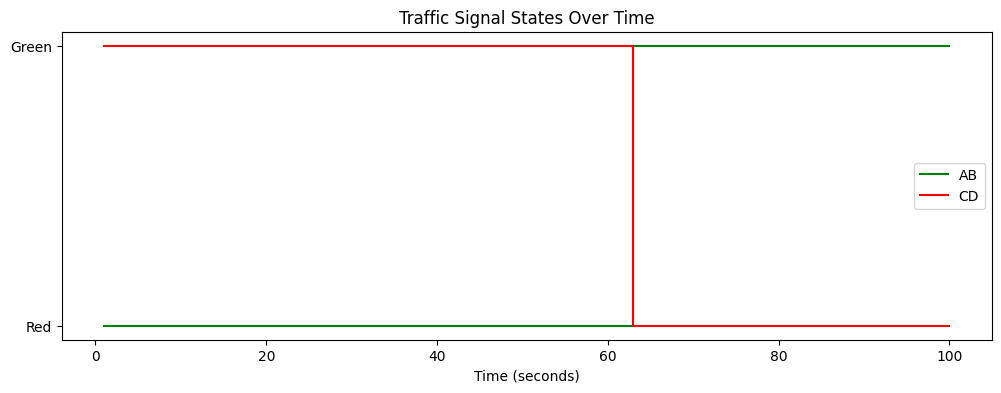

In [5]:
import matplotlib.pyplot as plt

# Initialize lists for visualization
time_steps = []
colors_AB = []
colors_CD = []

current_time = 0
current_phase = "AB"

while current_time < len(density_data["A"]):

    for t in range(current_time, min(current_time + SIGNAL_PERIOD, len(density_data['A']))):
        time_steps.append(t + 1)  # Start from 1
        if t < phase_end_time:
            colors_AB.append("green")
            colors_CD.append("red")
        else:
            colors_AB.append("red")
            colors_CD.append("green")

    current_time += SIGNAL_PERIOD

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 4))

# Plot signal states using a step function
ax.step(time_steps, colors_AB, where='post', label='AB', color='green')
ax.step(time_steps, colors_CD, where='post', label='CD', color='red')

# Customize plot
ax.set_xlabel("Time (seconds)")
ax.set_yticks([0, 1])
ax.set_yticklabels(['Red', 'Green'])
ax.set_title("Traffic Signal States Over Time")
ax.legend()

# Show the plot
plt.show()
